In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('df_98039_new.csv')

In [3]:
df.describe()

,sqft_living,price
count,50.0000,5.000000e+01
mean,3800.9000,2.160607e+06
std,1764.5025,1.166477e+06
min,1220.0000,7.875000e+05
25%,2680.0000,1.401000e+06
50%,3560.0000,1.892500e+06
75%,4452.5000,2.556250e+06
max,9890.0000,6.885000e+06


In [37]:
X = df['sqft_living']
y = df['price']
m = len(X)

In [38]:
#Hypothesis function
def hypo(X,a0,a1):
    hypo = a0 + a1*X   #y=mx+c
    return hypo

#Cost Function J(x0,x1)
def J(a0,a1,X,y,m):
    j=0
    for i in range(m):
        j += (hypo(X[i],a0,a1) - y[i])**2  #calculating cost function
    return j/(2*m)
    
#Gradient Descent function
def gradient(a0,a1,X,y,m):
    Dja0 = 0
    Dja1 = 0
    
    for i in range(m):
        Dja0 += (hypo(X[i],a0,a1)-y[i])  #Dja0 =Dja0+ (hypo(X[i],a0,a1)-y[i])
        Dja1 += (hypo(X[i],a0,a1)-y[i])*X[i]  #Dja0 =Dja0+ (hypo(X[i],a0,a1)-y[i])*X[i]
    
    gradJ = [Dja0/m,Dja1/m]
    return gradJ

#updating the theta values i.e. a0,a1 values
def update(a0,a1,gradient,alpha):
    
    a0p1 = a0 - alpha*gradient[0]
    a1p1 = a1 - alpha*gradient[1]
    
    update = [a0p1,a1p1]
    return update
    
    
        
    

In [39]:
a = np.linspace(-2,2,10)  #divides -2 to 2 in 10 parts
a

array([-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ])

-0.16721110266192546 0.6140302606695959


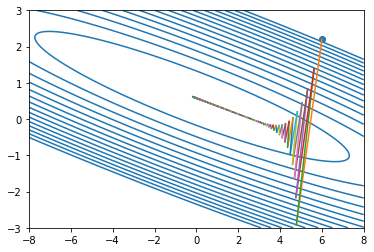

In [99]:
fig, ax = plt.subplots()
p0 = np.linspace(-8,8,500)  #divides -8 to 8 in 500 parts
p1 = np.linspace(-3,3,500)  #divides -5 to 5 in 500 parts

#THe numpy.meshgrid method is used to create a rerctangular grid out of two 
#given one-dimensional arrays representing the Cartesian indexing 
#or Matrix indexing 
pa0,pa1 = np.meshgrid(p0,p1)  

#plotting contour plot - representing Cost Function in 2D form
ax.contour(pa0,pa1,J(pa0,pa1,X/1000,y/1000000,m=len(X)), colors='C0', levels=[i for i in np.arange(0,80,5)] )
#Levels:int or array-like , optional . Determines the number and positions of 
#contour lines/regions

a0=6
a1=2.2
ax.plot(a0,a1,'o')

for i in range(300):
    a0old,a1old = a0,a1
    gJ=gradient(a0,a1,X/1000,y/1000000,m)
    a0,a1 = update(a0,a1,gradient(a0,a1,X/1000,y/1000000,m), alpha=0.1) #alpha should be 0.1
    ax.plot(a0,a1,'r')
    ax.plot([a0old,a0],[a1old,a1],'-')
    
print(a0,a1)
 




In [100]:
X_mean = X.mean()
X_std = X.std()

y_mean = y.mean()
y_std = y.std()

#Mean Normalization
X_new = (X - X_mean)/X_std
y_new = (y - y_mean)/y_std

-1 4
-0.4999999999999999 2.5010345733150263
-0.24999999999999983 1.736562205705689
-0.12499999999999996 1.3466812982249272
-0.0625 1.1478420354097387
-0.031250000000000014 1.0464340113739925
-0.01562500000000002 0.9947159191157618
-0.007812500000000045 0.9683396920640642
-0.00390625000000005 0.9548878162676984
-0.0019531250000000572 0.9480273596115518
-0.0009765625000000447 0.944528526716917


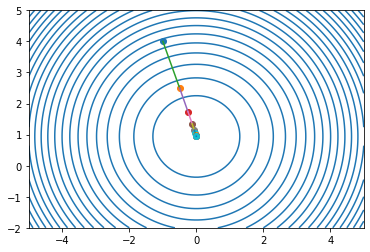

In [112]:
#Plotting function
def plot_s(start=[-1,4],alpha=0.5,steps=10):
    fig, ax = plt.subplots()
    p0 = np.linspace(-5,5,100)  #divides -8 to 8 in 500 parts
    p1 = np.linspace(-2,5,100)  #divides -5 to 5 in 500 parts

    #THe numpy.meshgrid method is used to create a rerctangular grid out of two 
    #given one-dimensional arrays representing the Cartesian indexing 
    #or Matrix indexing 
    pa0,pa1 = np.meshgrid(p0,p1)  

    #plotting contour plot - representing Cost Function in 2D form
    ax.contour(pa0,pa1,J(pa0,pa1,X_new,y_new,m=len(X)), colors='C0', levels=[i for i in np.arange(0,80,0.9)] )
    #Levels:int or array-like , optional . Determines the number and positions of 
    #contour lines/regions

    a0=start[0]
    a1=start[1]
    ax.plot(a0,a1,'o')
    print(a0,a1)

    for i in range(steps):
        a0old,a1old = a0,a1
        gJ=gradient(a0,a1,X_new,y_new,m)
        a0,a1 = update(a0,a1,gJ, alpha=alpha) 
        print(a0,a1) #printing updated values
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1],'-') #connecting the dots


plot_s(start=[-1,4],alpha=0.5,steps=10)



-1 4
-0.4999999999999999 2.5010345733150263
-0.24999999999999983 1.736562205705689
-0.12499999999999996 1.3466812982249272
-0.0625 1.1478420354097387
-0.031250000000000014 1.0464340113739925
-0.01562500000000002 0.9947159191157618
-0.007812500000000045 0.9683396920640642
-0.00390625000000005 0.9548878162676984
-0.0019531250000000572 0.9480273596115518
-0.0009765625000000447 0.944528526716917


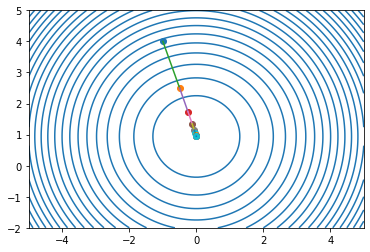

In [113]:
plot_s([-1, 4], 0.5, 10)

In [114]:
a0,a1

(-0.16721110266192546, 0.6140302606695959)

In [115]:
#plotting liner reg graphs
def plot_graph(X,y,a0,a1):
    fig, ax = plt.subplots()
    ax.plot(X,y,'o',label="training data")  #'o' is for dots
    ax.plot(X,hypo(X_new,a0,a1),label="h(x) = %.2f + %.2f * x"%(a0,a1))
    plt.legend()

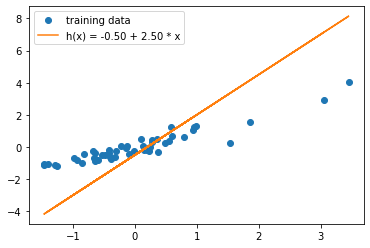

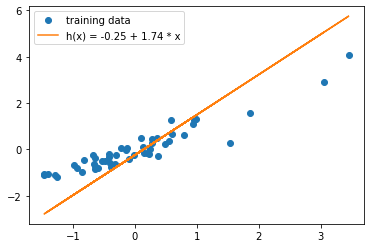

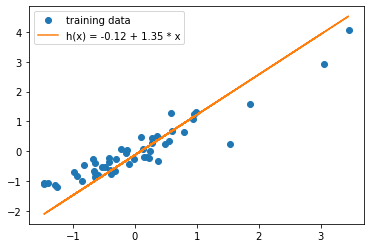

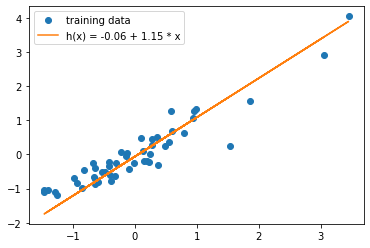

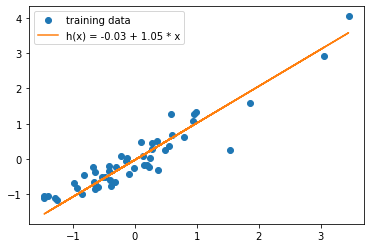

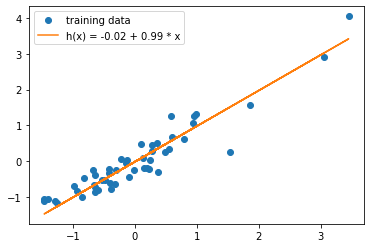

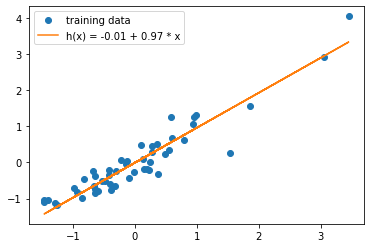

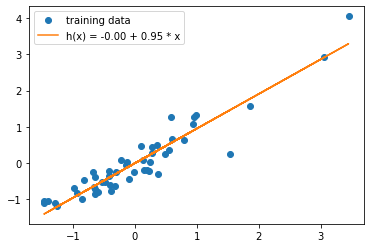

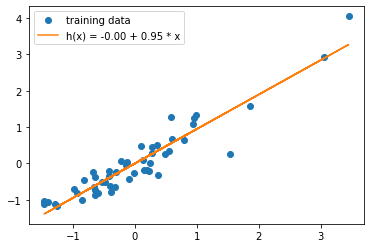

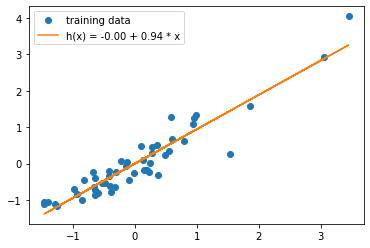

In [116]:
a0=-1
a1=4
for i in range(10):
    gJ = gradient(a0,a1,X_new,y_new,m)
    a0,a1 = update(a0,a1,gJ,alpha=0.5)
    plot_graph(X_new,y_new,a0,a1)

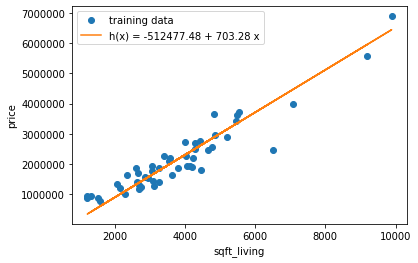

In [117]:
a0 = 0
a1 = 0.94

b1 = y_std/(X_std*a1)
b0 = y_std*a0 - b1*X_mean + y_mean

fig, ax = plt.subplots()

ax.plot(X,y,'o',label="training data")
ax.plot(X,b0+b1*X,label='h(x) = %.2f + %.2f x'%(b0,b1))
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
plt.legend()

In [118]:
#Predicting the price
def predict(X,a0,a1):
    pre = y_std*(a0 + a1*(X - X_mean)/X_std) + y_mean
    return pre


In [119]:
a0 = 0
a1 = 0.94
predict(8000,a0,a1)

4769991.23445102